### Get Test Data Only
We are going to evaluate the models using the `etaylor_cannabis_patches_test_26-04-2024_15-44-44` test dataset.

In [8]:
import numpy as np

def convert_ndarrays_to_lists(obj):
    if isinstance(obj, dict):
        return {k: convert_ndarrays_to_lists(v) for k, v in obj.items()}
    elif isinstance(obj, list):
        return [convert_ndarrays_to_lists(elem) for elem in obj]
    elif isinstance(obj, np.ndarray):
        return obj.tolist()
    else:
        return obj

### Evaluation Methods
We are going to use `BaseEvaluator` class for evaluating the models, which will perform classification. 


In [1]:
import os

dataset_path = "/home/etaylor/code_projects/thesis/segments/etaylor_cannabis_patches_test_26-04-2024_15-44-44"
images_dir_path = os.path.join(dataset_path, "v0.1")
coco_annotations_path = os.path.join(dataset_path, "annotations", "export_coco-instance_etaylor_cannabis_patches_test_26-04-2024_15-44-44_v0.1.json")
yolo_annotations_dir_path = os.path.join(dataset_path, "annotations", "yolo", "labels", "export_coco-instance_etaylor_cannabis_patches_test_26-04-2024_15-44-44_v0.1")


### Evaluating the Detectron2 models

In [2]:
# Setup detectron2 logger
from detectron2.utils.logger import setup_logger
setup_logger()

from detectron2.config import get_cfg
from detectron2.engine import DefaultPredictor

In [3]:
from src.segmentation.evaluation.detectron2_evaluator import Detectron2Evaluator

detectron2_evaluator = Detectron2Evaluator(num_classes=3,coco_annotations_file_path=coco_annotations_path)

dataset_gt_boxes = detectron2_evaluator.get_annotations_for_dataset(images_directory=images_dir_path)

In [4]:
# setup all the models configurations for that evaluation experiment
models_configs = [
    {
        "model_name": "mask_rcnn_R_50_FPN_3x",
        "checkpoint": "/home/etaylor/code_projects/thesis/checkpoints/detectron2/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/29-04-2024_16-02-00/model_final.pth",
        "yaml_file": "/home/etaylor/code_projects/thesis/checkpoints/detectron2/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/29-04-2024_16-02-00/config.yaml"
    },
    {
        "model_name": "mask_rcnn_X_101_32x8d_FPN_3x",
        "checkpoint": "/home/etaylor/code_projects/thesis/checkpoints/detectron2/COCO-InstanceSegmentation/mask_rcnn_X_101_32x8d_FPN_3x/27-04-2024_13-54-23/model_final.pth",
        "yaml_file": "/home/etaylor/code_projects/thesis/checkpoints/detectron2/COCO-InstanceSegmentation/mask_rcnn_X_101_32x8d_FPN_3x/27-04-2024_13-54-23/config.yaml"
    },
    {
        "model_name": "faster_rcnn_R_50_C4_1x",
        "checkpoint": "/home/etaylor/code_projects/thesis/checkpoints/detectron2/COCO-Detection/faster_rcnn_R_50_C4_1x/29-04-2024_16-09-41/model_final.pth",
        "yaml_file": "/home/etaylor/code_projects/thesis/checkpoints/detectron2/COCO-Detection/faster_rcnn_R_50_C4_1x/29-04-2024_16-09-41/config.yaml"
    },
    {
        "model_name": "faster_rcnn_R_50_DC5_1x",
        "checkpoint": "/home/etaylor/code_projects/thesis/checkpoints/detectron2/COCO-Detection/faster_rcnn_R_50_DC5_1x/29-04-2024_16-09-55/model_final.pth",
        "yaml_file": "/home/etaylor/code_projects/thesis/checkpoints/detectron2/COCO-Detection/faster_rcnn_R_50_DC5_1x/29-04-2024_16-09-55/config.yaml"
    },
]

In [5]:
models_scores = {}
models_preds = {}
for model_config in models_configs:
    
    cfg = get_cfg()
    # load config
    cfg.merge_from_file(model_config['yaml_file'])
    
    # load checkpoint
    cfg.MODEL.WEIGHTS = model_config['checkpoint']
    cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5
    
    # define predictor
    predictor = DefaultPredictor(cfg)
    
    # get predictions as bounding boxes
    dataset_pred_boxes = detectron2_evaluator.predict_and_parse_dataset(images_directory=images_dir_path, predictor=predictor)
    
    # evaluate the predictions on the gt boxes
    eval_results = detectron2_evaluator.evaluate_dataset(dataset_gt_boxes_dict=dataset_gt_boxes,
                                                        dataset_pred_boxes_dict=dataset_pred_boxes)
    
    models_preds[model_config['model_name']] = eval_results

Loading config /home/etaylor/code_projects/thesis/checkpoints/detectron2/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/29-04-2024_16-02-00/config.yaml with yaml.unsafe_load. Your machine may be at risk if the file contains malicious content.


[05/24 13:32:09 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from /home/etaylor/code_projects/thesis/checkpoints/detectron2/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/29-04-2024_16-02-00/model_final.pth ...


/home/etaylor/.conda/envs/detectron/lib/python3.9/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
Loading config /home/etaylor/code_projects/thesis/checkpoints/detectron2/COCO-InstanceSegmentation/mask_rcnn_X_101_32x8d_FPN_3x/27-04-2024_13-54-23/config.yaml with yaml.unsafe_load. Your machine may be at risk if the file contains malicious content.


[05/24 13:32:23 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from /home/etaylor/code_projects/thesis/checkpoints/detectron2/COCO-InstanceSegmentation/mask_rcnn_X_101_32x8d_FPN_3x/27-04-2024_13-54-23/model_final.pth ...


Loading config /home/etaylor/code_projects/thesis/checkpoints/detectron2/COCO-Detection/faster_rcnn_R_50_C4_1x/29-04-2024_16-09-41/config.yaml with yaml.unsafe_load. Your machine may be at risk if the file contains malicious content.


[05/24 13:32:41 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from /home/etaylor/code_projects/thesis/checkpoints/detectron2/COCO-Detection/faster_rcnn_R_50_C4_1x/29-04-2024_16-09-41/model_final.pth ...


Loading config /home/etaylor/code_projects/thesis/checkpoints/detectron2/COCO-Detection/faster_rcnn_R_50_DC5_1x/29-04-2024_16-09-55/config.yaml with yaml.unsafe_load. Your machine may be at risk if the file contains malicious content.


[05/24 13:32:56 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from /home/etaylor/code_projects/thesis/checkpoints/detectron2/COCO-Detection/faster_rcnn_R_50_DC5_1x/29-04-2024_16-09-55/model_final.pth ...


In [6]:
models_preds

{'mask_rcnn_R_50_FPN_3x': {'metrics': {'precision': 0.6297043010752689,
   'recall': 0.6144262295081967,
   'class_wise_precision': array([0.63586957, 0.6267672 , 0.6440678 ]),
   'class_wise_recall': array([0.42622951, 0.77146172, 0.33333333])},
  'confusion_matrix': array([[234, 191,   1, 123],
         [ 60, 665,   7, 130],
         [  2,  12,  38,  62],
         [ 72, 193,  13,   0]]),
  'normalized_confusion_matrix': array([[0.4262295 , 0.34790528, 0.00182149, 0.22404371],
         [0.06960557, 0.7714617 , 0.00812065, 0.15081206],
         [0.01754386, 0.10526316, 0.33333334, 0.54385966],
         [0.2589928 , 0.6942446 , 0.04676259, 0.        ]], dtype=float32)},
 'mask_rcnn_X_101_32x8d_FPN_3x': {'metrics': {'precision': 0.6681190994916485,
   'recall': 0.6032786885245902,
   'class_wise_precision': array([0.66004963, 0.67066521, 0.68421053]),
   'class_wise_recall': array([0.4845173 , 0.71345708, 0.34210526])},
  'confusion_matrix': array([[266, 138,   2, 143],
         [ 79, 61

In [8]:
# Convert all numpy arrays to lists in the dictionary
models_preds = convert_ndarrays_to_lists(models_preds)

In [9]:
# save models scores
import json
detectron2_models_results_saveing_path = os.path.join("/home/etaylor/code_projects/thesis/data/models_scores", "detectron2_models_evaluator_result_22_05_2024.json")
with open(detectron2_models_results_saveing_path, "w") as f:
    json.dump(models_preds, f, indent=4)
    
print("Models scores saved to: ", os.path.join(dataset_path, "annotations", "models_scores.json"))

Models scores saved to:  /home/etaylor/code_projects/thesis/segments/etaylor_cannabis_patches_test_26-04-2024_15-44-44/annotations/models_scores.json


### Evaluating the Ultralytics Models

In [2]:
import os

dataset_path = "/home/etaylor/code_projects/thesis/segments/etaylor_cannabis_patches_test_26-04-2024_15-44-44"
images_dir_path = os.path.join(dataset_path, "v0.1")
coco_annotations_path = os.path.join(dataset_path, "annotations", "export_coco-instance_etaylor_cannabis_patches_test_26-04-2024_15-44-44_v0.1.json")
yolo_annotations_dir_path = os.path.join(dataset_path, "annotations", "yolo", "labels", "export_coco-instance_etaylor_cannabis_patches_test_26-04-2024_15-44-44_v0.1")


In [3]:
from src.segmentation.evaluation.ultralytics_evaluator import UltralyticsEvaluator

ultralytics_evaluator = UltralyticsEvaluator(num_classes=3, image_size=512)

dataset_gt_boxes = ultralytics_evaluator.get_annotations_for_dataset(annotations_directory=yolo_annotations_dir_path)

In [4]:
# setup models configs
ultralytics_models_configs = [
    {
        "model_name": "rtdetr_x",
        "checkpoint": "/home/etaylor/code_projects/thesis/src/segmentation/notebooks/ultralytics/runs/old/train14/weights/best.pt"
    },
    {
        "model_name": "yolov5xu",
        "checkpoint": "/home/etaylor/code_projects/thesis/src/segmentation/notebooks/ultralytics/runs/old/train17/weights/best.pt"
    },
    {
        "model_name": "yolov8x",
        "checkpoint": "/home/etaylor/code_projects/thesis/src/segmentation/notebooks/ultralytics/runs/old/train16/weights/best.pt"
    },
    {
        "model_name": "yolov9c",
        "checkpoint": "/home/etaylor/code_projects/thesis/src/segmentation/notebooks/ultralytics/runs/old/train12/weights/best.pt"
    }
]

In [5]:
from ultralytics import RTDETR
from ultralytics import YOLO


ultralytics_models_scores = {}

for model_config in ultralytics_models_configs:
    
    if model_config['model_name'] == "rtdetr_x":
        predictor = RTDETR(model_config['checkpoint'])
    else:
        predictor = YOLO(model_config['checkpoint'])
        
    print(f"Predicting with model: {model_config['model_name']}")
    
    # predict the dataset
    dataset_pred_boxes = ultralytics_evaluator.predict_and_parse_dataset(images_directory=images_dir_path, predictor=predictor)
    
    # evaluate the predictions on the gt boxes
    eval_results = ultralytics_evaluator.evaluate_dataset(dataset_gt_boxes_dict=dataset_gt_boxes,
                                                        dataset_pred_boxes_dict=dataset_pred_boxes)
    
    # save the results
    ultralytics_models_scores[model_config['model_name']] = eval_results
    

Predicting with model: rtdetr_x

image 1/1 /home/etaylor/code_projects/thesis/segments/etaylor_cannabis_patches_test_26-04-2024_15-44-44/v0.1/IMG_1093_p0.png: 512x512 4 trichomes, 21 clears, 5 cloudys, 61.5ms
Speed: 11.4ms preprocess, 61.5ms inference, 55.6ms postprocess per image at shape (1, 3, 512, 512)

image 1/1 /home/etaylor/code_projects/thesis/segments/etaylor_cannabis_patches_test_26-04-2024_15-44-44/v0.1/IMG_1093_p10.png: 512x512 6 trichomes, 10 clears, 63.0ms
Speed: 0.9ms preprocess, 63.0ms inference, 0.7ms postprocess per image at shape (1, 3, 512, 512)

image 1/1 /home/etaylor/code_projects/thesis/segments/etaylor_cannabis_patches_test_26-04-2024_15-44-44/v0.1/IMG_1093_p11.png: 512x512 4 trichomes, 12 clears, 2 cloudys, 59.5ms
Speed: 0.6ms preprocess, 59.5ms inference, 0.6ms postprocess per image at shape (1, 3, 512, 512)

image 1/1 /home/etaylor/code_projects/thesis/segments/etaylor_cannabis_patches_test_26-04-2024_15-44-44/v0.1/IMG_1093_p2.png: 512x512 3 trichomes, 3 cle

In [6]:
ultralytics_models_scores

{'rtdetr_x': {'metrics': {'precision': 0.48035714285714287,
   'recall': 0.7055737704918033,
   'class_wise_precision': array([    0.51613,     0.46688,     0.47748]),
   'class_wise_recall': array([    0.55373,     0.83411,     0.46491])},
  'confusion_matrix': array([[304, 169,   3,  73],
         [ 61, 719,   7,  75],
         [  1,  18,  53,  42],
         [223, 634,  48,   0]]),
  'normalized_confusion_matrix': array([[    0.55373,     0.30783,   0.0054645,     0.13297],
         [   0.070766,     0.83411,   0.0081206,    0.087007],
         [  0.0087719,     0.15789,     0.46491,     0.36842],
         [    0.24641,     0.70055,    0.053039,           0]], dtype=float32)},
 'yolov5xu': {'metrics': {'precision': 0.592741935483871,
   'recall': 0.5783606557377049,
   'class_wise_precision': array([    0.61064,     0.58163,     0.69811]),
   'class_wise_recall': array([    0.39709,     0.72738,     0.32456])},
  'confusion_matrix': array([[218, 177,   2, 152],
         [ 52, 627,   

In [9]:
import json

# save evaluation results
ultralytics_models_scores = convert_ndarrays_to_lists(ultralytics_models_scores)

ultralytics_models_results_saveing_path = os.path.join("/home/etaylor/code_projects/thesis/data/models_scores", "ultralytics_models_evaluator_result_22_05_2024.json")

with open(ultralytics_models_results_saveing_path, "w") as f:
    json.dump(ultralytics_models_scores, f, indent=4)
    
print("Models scores saved to: ", ultralytics_models_results_saveing_path)


Models scores saved to:  /home/etaylor/code_projects/thesis/data/models_scores/ultralytics_models_evaluator_result_22_05_2024.json


### Analyze Evaluator Results
In this section we will analyze with graphs the results received by evaluating all the models using the Evaluator

In [10]:
# laod the results jsons
import json
import os

detectron2_models_results_saveing_path = os.path.join("/home/etaylor/code_projects/thesis/data/models_scores", "detectron2_models_evaluator_result_22_05_2024.json")
ultralytics_models_results_saveing_path = os.path.join("/home/etaylor/code_projects/thesis/data/models_scores", "ultralytics_models_evaluator_result_22_05_2024.json")

with open(detectron2_models_results_saveing_path, "r") as f:
    detectron2_models_scores = json.load(f)
    
with open(ultralytics_models_results_saveing_path, "r") as f:
    ultralytics_models_scores = json.load(f)


In [11]:
import matplotlib.pyplot as plt
import numpy as np


def plot_metric_bar(models_results, metric_name, ylabel):
    labels = list(models_results.keys())
    values = [results['metrics'][metric_name] for results in models_results.values()]
    
    if isinstance(values[0], list) or isinstance(values[0], np.ndarray):
        x = np.arange(len(labels))
        width = 0.2  # Width of the bars
        num_classes = len(values[0])
        fig, ax = plt.subplots(figsize=(12, 6))
        for i in range(num_classes):
            class_values = [v[i] for v in values]
            ax.bar(x + i * width, class_values, width, label=f'Class {i+1}')
        
        ax.set_xlabel('Models')
        ax.set_ylabel(ylabel)
        ax.set_title(f'{ylabel} for different models')
        ax.set_xticks(x + width * (num_classes - 1) / 2)
        ax.set_xticklabels(labels)
        plt.xticks(rotation=45)
    else:
        x = np.arange(len(labels))
        fig, ax = plt.subplots(figsize=(10, 6))
        ax.bar(x, values, width=0.5)
        
        ax.set_xlabel('Models')
        ax.set_ylabel(ylabel)
        ax.set_title(f'{ylabel} for different models')
        ax.set_xticks(x)
        ax.set_xticklabels(labels)
        plt.xticks(rotation=45)
    
    ax.legend()
    plt.show()
    
    
def plot_confusion_matrix(models_results, normalized=True):
    for model, results in models_results.items():
        if normalized:
            matrix = np.array(results['normalized_confusion_matrix'])
        else:
            matrix = np.array(results['confusion_matrix'])
        
        plt.figure(figsize=(8, 6))
        plt.imshow(matrix, interpolation='nearest', cmap=plt.cm.Blues)
        plt.title(f'Confusion Matrix for {model}')
        plt.colorbar()
        tick_marks = np.arange(len(matrix))
        plt.xticks(tick_marks, tick_marks, rotation=45)
        plt.yticks(tick_marks, tick_marks)
        
        fmt = '.2f' if normalized else 'd'
        thresh = matrix.max() / 2.
        for i, j in np.ndindex(matrix.shape):
            plt.text(j, i, format(matrix[i, j], fmt),
                    horizontalalignment="center",
                    color="white" if matrix[i, j] > thresh else "black")
        
        plt.ylabel('True label')
        plt.xlabel('Predicted label')
        plt.tight_layout()
        plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


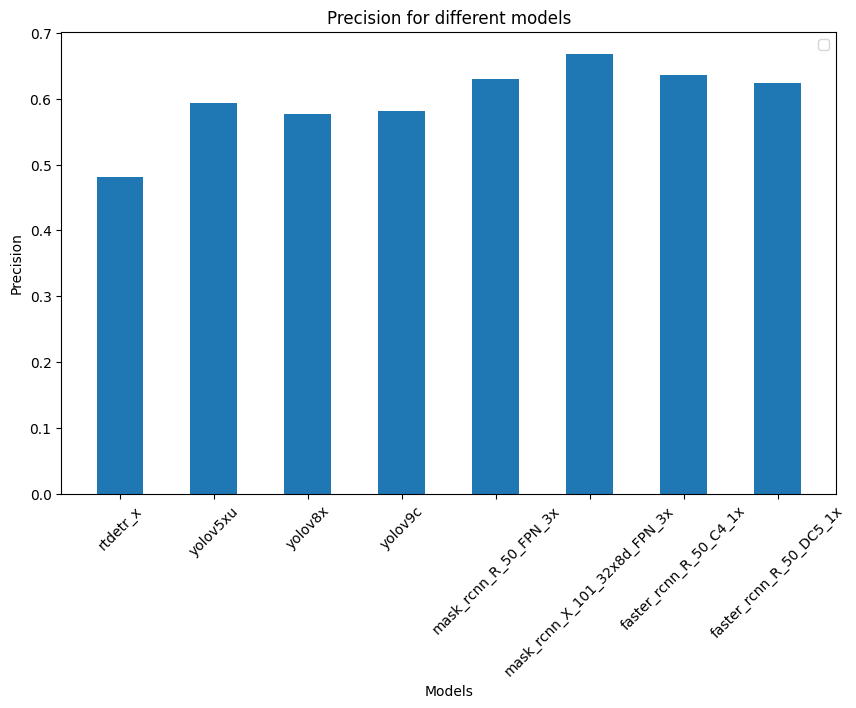

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


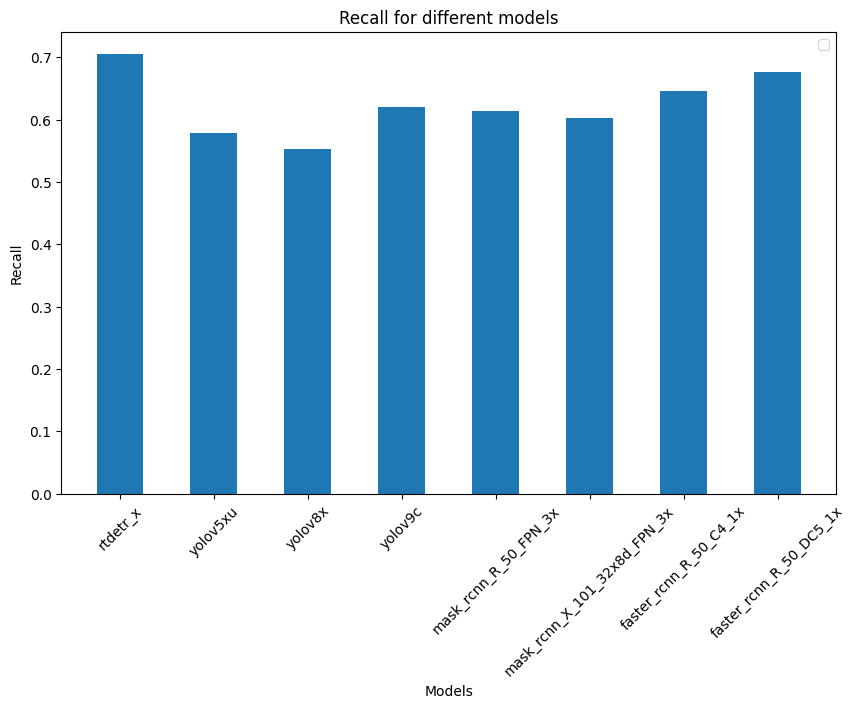

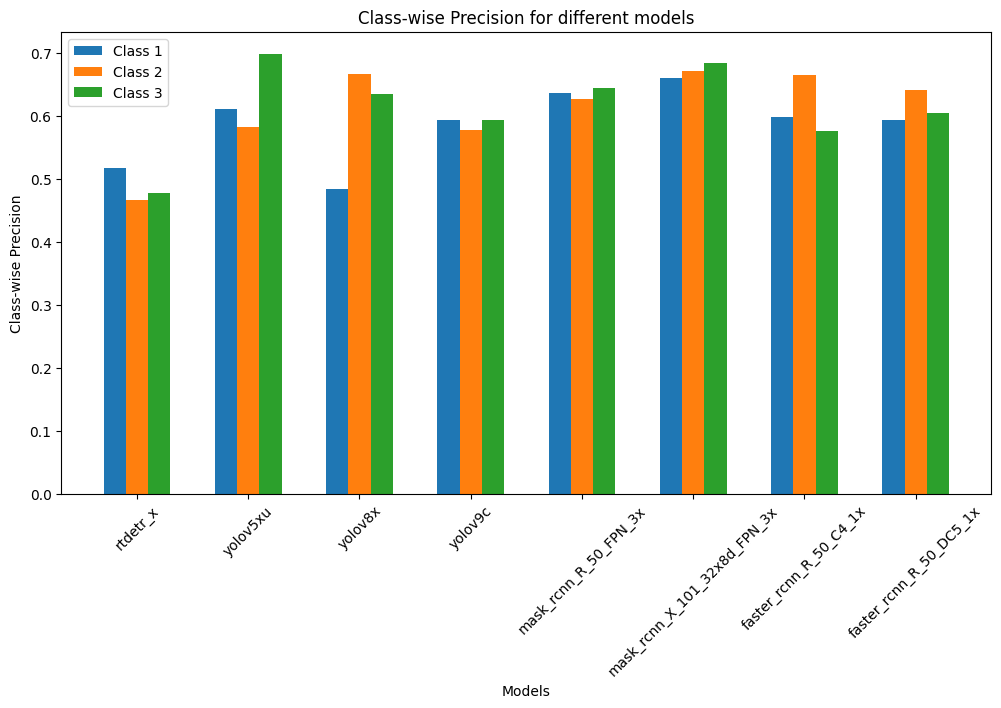

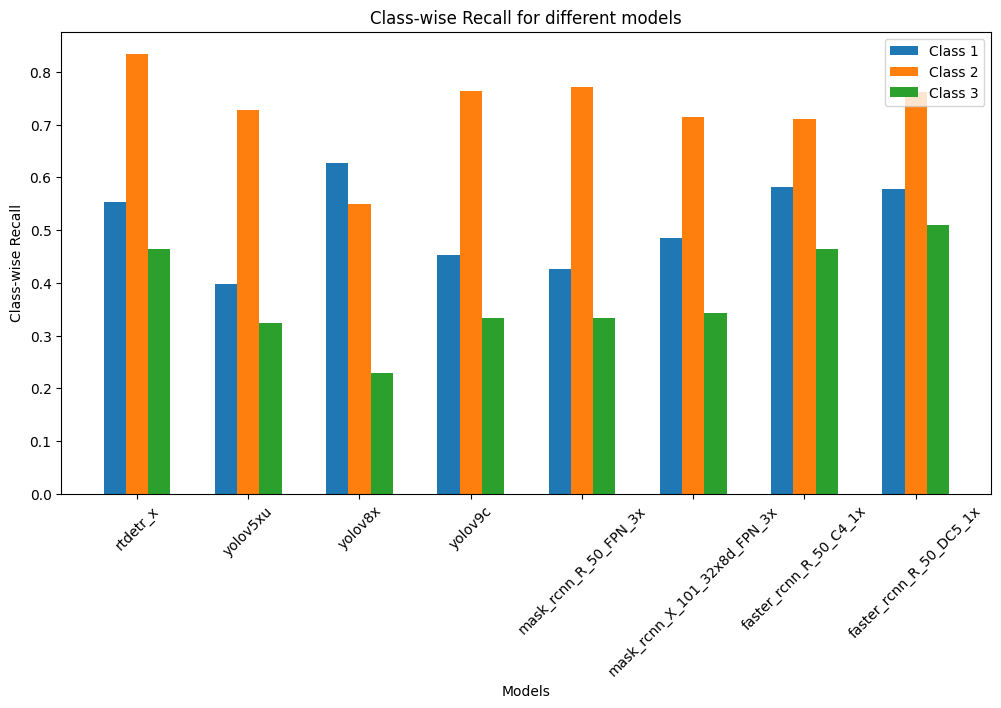

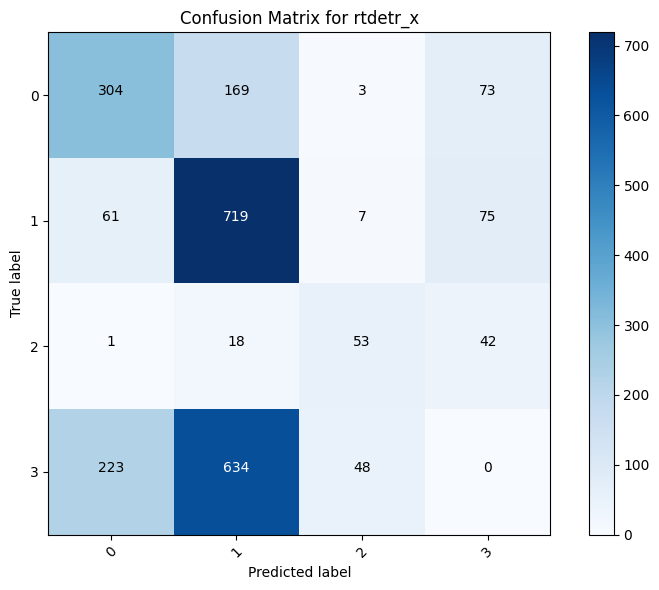

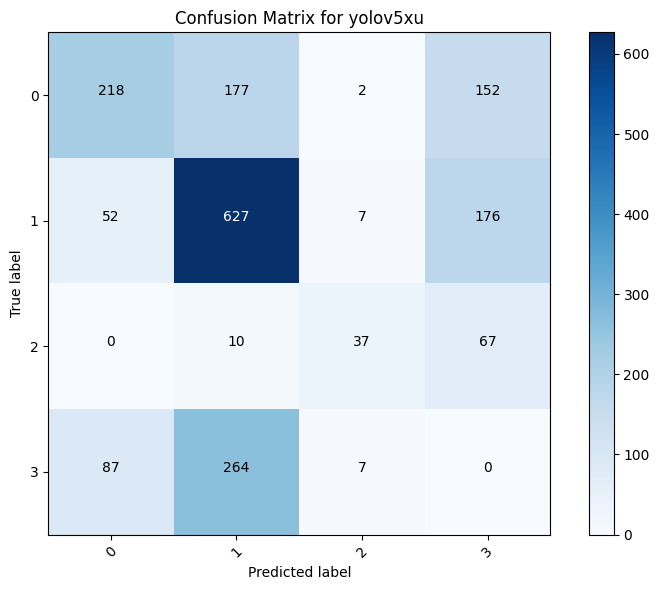

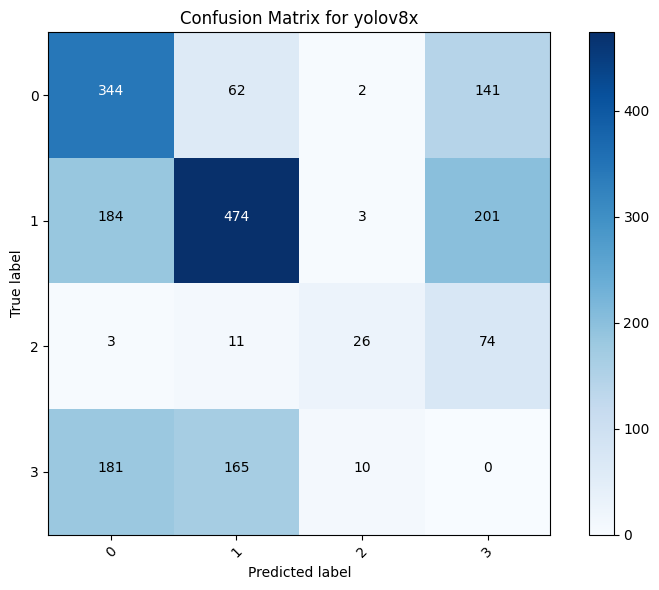

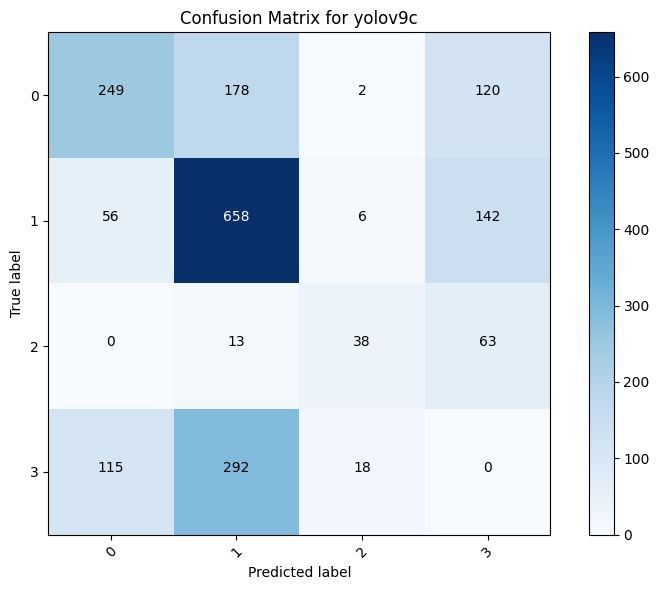

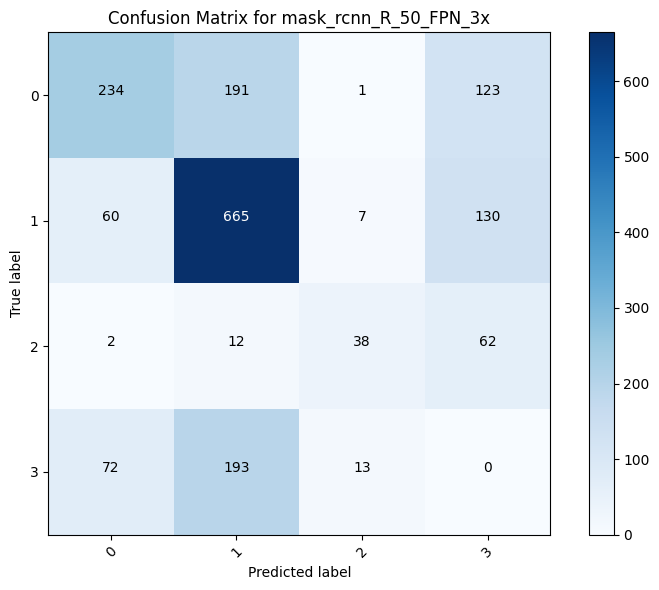

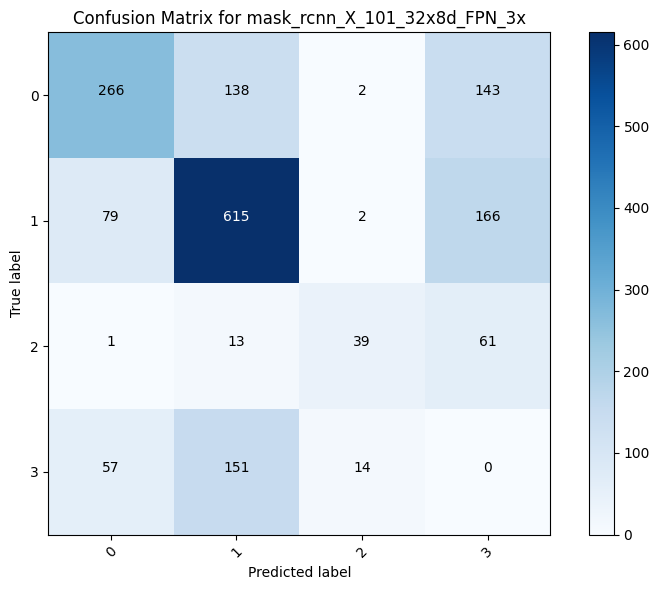

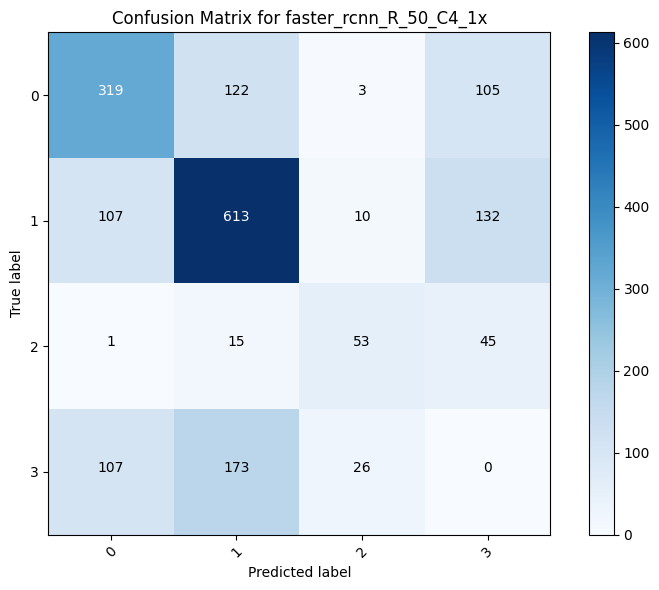

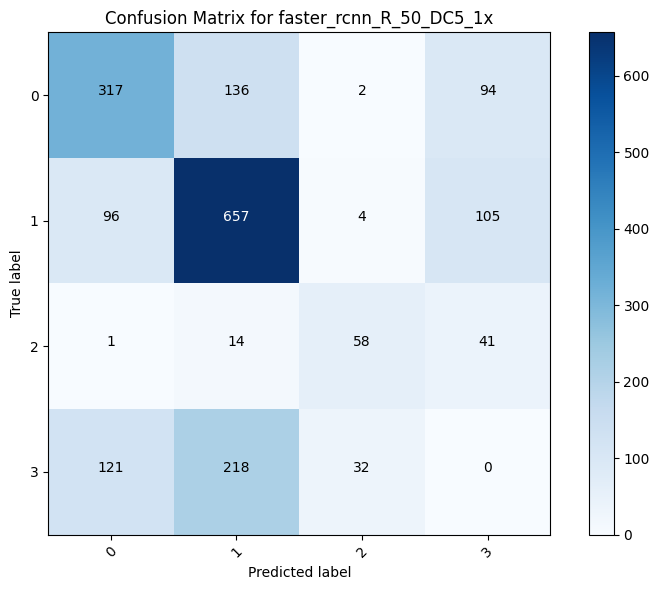

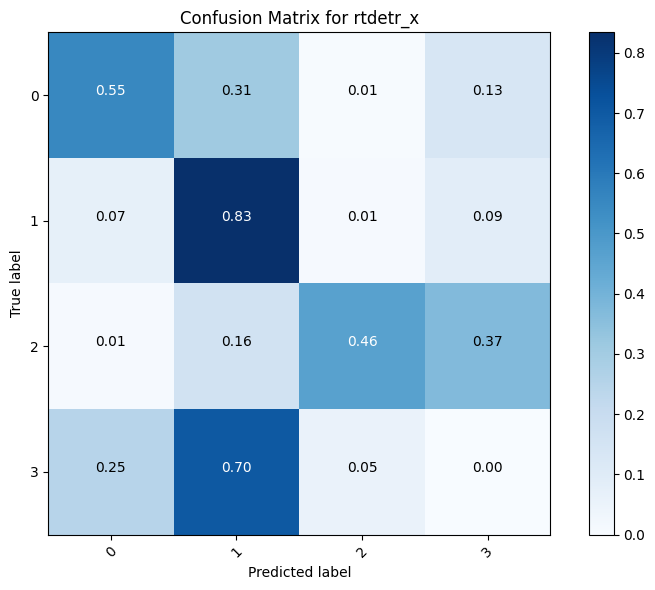

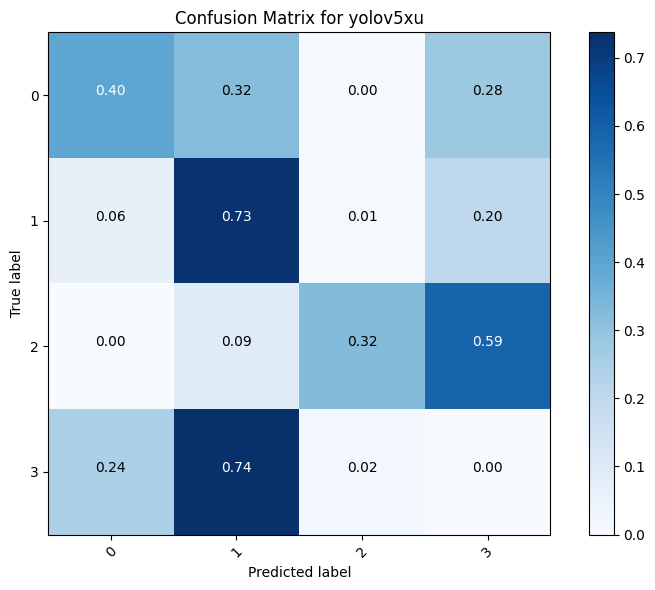

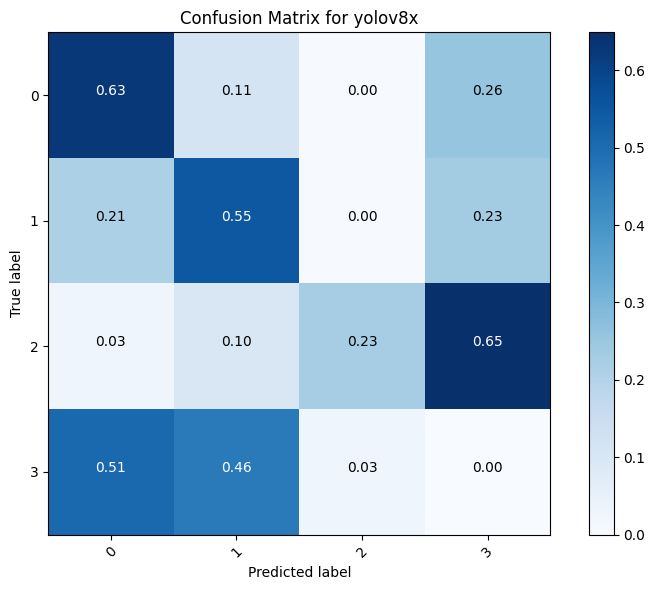

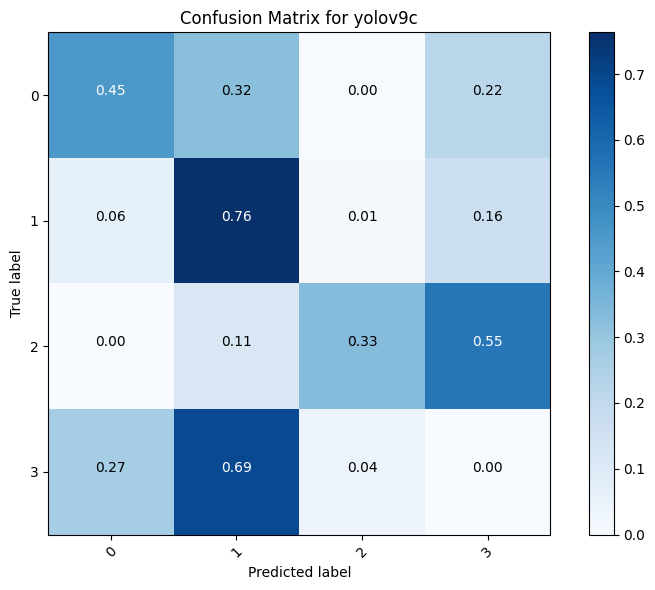

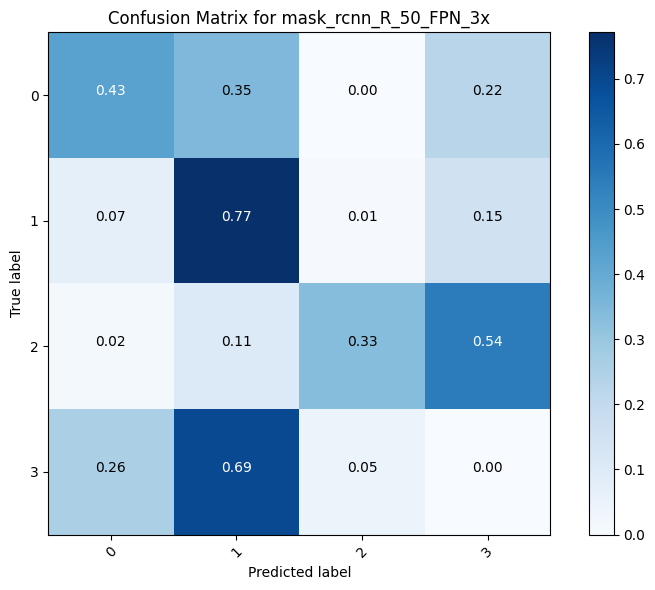

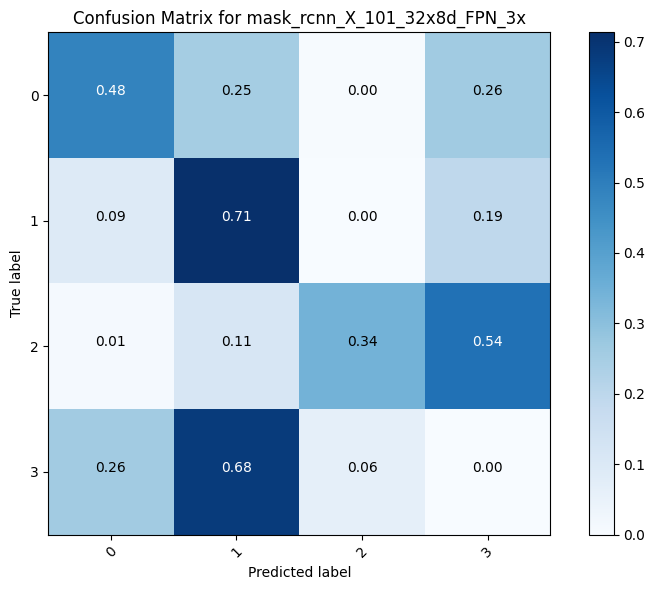

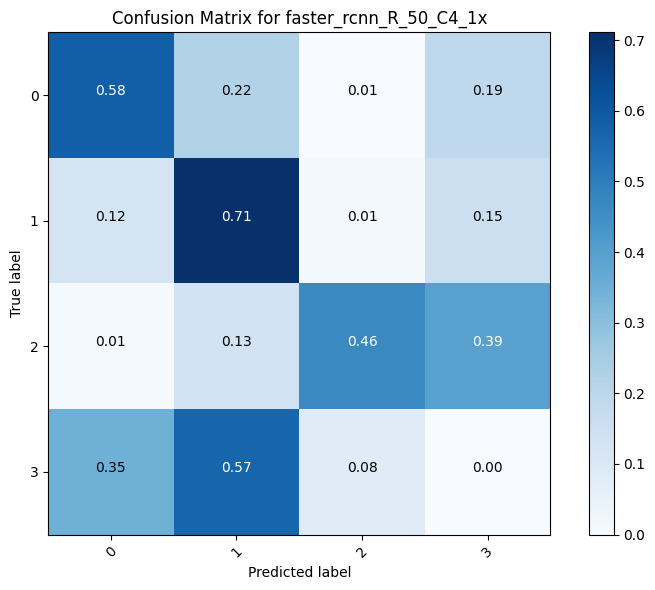

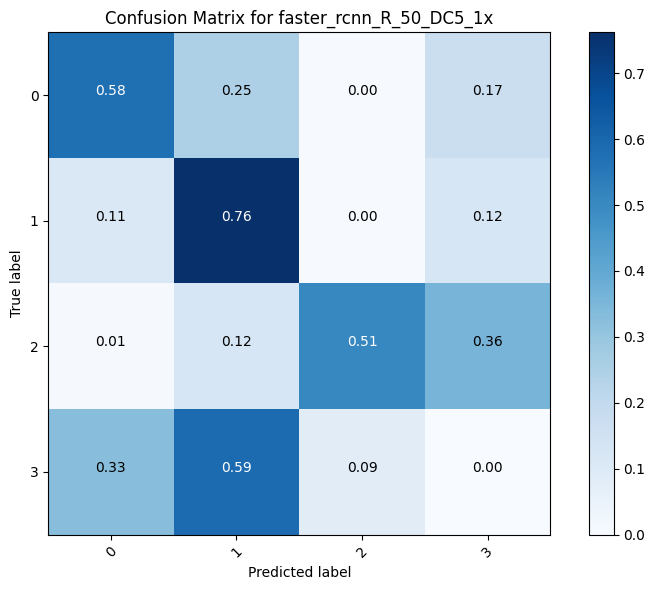

In [12]:
# Combine the dictionaries
combined_results = {**ultralytics_models_scores, **detectron2_models_scores}

# Example usage with the combined results dictionary
plot_metric_bar(combined_results, 'precision', 'Precision')
plot_metric_bar(combined_results, 'recall', 'Recall')
plot_metric_bar(combined_results, 'class_wise_precision', 'Class-wise Precision')
plot_metric_bar(combined_results, 'class_wise_recall', 'Class-wise Recall')
plot_confusion_matrix(combined_results, normalized=False)
plot_confusion_matrix(combined_results, normalized=True)
